# 1. Keras -- MLPs on MNIST Assignment

## 1.1 Importing required Libraries

In [1]:
# if you keras is not using tensorflow as backend set "KERAS_BACKEND=tensorflow" use this command
import tensorflow as tf
from keras.utils import np_utils 
from keras.datasets import mnist 
import seaborn as sns
from keras.initializers import RandomNormal
from keras.layers.normalization import BatchNormalization
from keras.layers.normalization import BatchNormalization
from keras.layers import Dropout

Using TensorFlow backend.


## 1.2 Function to plot a dynamic plot

In [0]:

import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import time
# https://gist.github.com/greydanus/f6eee59eaf1d90fcb3b534a25362cea4
# https://stackoverflow.com/a/14434334
# this function is used to update the plots for each epoch and error
def plt_dynamic(x, vy, ty, ax, colors=['b']):
    ax.plot(x, vy, 'b', label="Validation Loss")
    ax.plot(x, ty, 'r', label="Train Loss")
    plt.legend()
    plt.grid()
    fig.canvas.draw()

## 1.3 High level overview of data set

In [3]:
# the data, shuffled and split between train and test sets 
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 2s 0us/step


In [4]:
print("Number of training examples :", X_train.shape[0], "and each image is of shape (%d, %d)"%(X_train.shape[1], X_train.shape[2]))
print("Number of training examples :", X_test.shape[0], "and each image is of shape (%d, %d)"%(X_test.shape[1], X_test.shape[2]))

Number of training examples : 60000 and each image is of shape (28, 28)
Number of training examples : 10000 and each image is of shape (28, 28)


In [0]:
# if you observe the input shape its 2 dimensional vector
# for each image we have a (28*28) vector
# we will convert the (28*28) vector into single dimensional vector of 1 * 784 

X_train = X_train.reshape(X_train.shape[0], X_train.shape[1]*X_train.shape[2]) 
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1]*X_test.shape[2]) 

In [6]:
# after converting the input images from 3d to 2d vectors

print("Number of training examples :", X_train.shape[0], "and each image is of shape (%d)"%(X_train.shape[1]))
print("Number of training examples :", X_test.shape[0], "and each image is of shape (%d)"%(X_test.shape[1]))

Number of training examples : 60000 and each image is of shape (784)
Number of training examples : 10000 and each image is of shape (784)


In [7]:
# An example data point
print(X_train[0])

[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   3  18  18  18 126 136 175  26 166 255
 247 127   0   0   0   0   0   0   0   0   0   0   0   0  30  36  94 154
 170 253 253 253 253 253 225 172 253 242 195  64   0   0   0   0   0   0
   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251  93  82
  82  56  39   0   0   0   0   0   0   0   0   0   0   0   0  18 219 253
 253 253 253 253 198 182 247 241   0   0   0   0   

## 1.4 Normalizing the train and test sets

In [0]:
# if we observe the above matrix each cell is having a value between 0-255
# before we move to apply machine learning algorithms lets try to normalize the data
# X => (X - Xmin)/(Xmax-Xmin) = X/255

X_train = X_train/255
X_test = X_test/255

In [9]:
# example data point after normlizing
print(X_train[0])

[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         

## 1.5 One-Hot Encoding the class label 

In [10]:
# here we are having a class number for each image
print("Class label of first image :", y_train[0])

# lets convert this into a 10 dimensional vector
# ex: consider an image is 5 convert it into 5 => [0, 0, 0, 0, 0, 1, 0, 0, 0, 0]
# this conversion needed for MLPs 

Y_train = np_utils.to_categorical(y_train, 10) 
Y_test = np_utils.to_categorical(y_test, 10)

print("After converting the output into a vector : ",Y_train[0])

Class label of first image : 5
After converting the output into a vector :  [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


## 1.6 A simple 2 layer model with Softmax classifier 

In [0]:
# https://keras.io/getting-started/sequential-model-guide/

# The Sequential model is a linear stack of layers.
# you can create a Sequential model by passing a list of layer instances to the constructor:

# model = Sequential([
#     Dense(32, input_shape=(784,)),
#     Activation('relu'),
#     Dense(10),
#     Activation('softmax'),
# ])

# You can also simply add layers via the .add() method:

# model = Sequential()
# model.add(Dense(32, input_dim=784))
# model.add(Activation('relu'))

###

# https://keras.io/layers/core/

# keras.layers.Dense(units, activation=None, use_bias=True, kernel_initializer='glorot_uniform', 
# bias_initializer='zeros', kernel_regularizer=None, bias_regularizer=None, activity_regularizer=None, 
# kernel_constraint=None, bias_constraint=None)

# Dense implements the operation: output = activation(dot(input, kernel) + bias) where
# activation is the element-wise activation function passed as the activation argument, 
# kernel is a weights matrix created by the layer, and 
# bias is a bias vector created by the layer (only applicable if use_bias is True).

# output = activation(dot(input, kernel) + bias)  => y = activation(WT. X + b)

####

# https://keras.io/activations/

# Activations can either be used through an Activation layer, or through the activation argument supported by all forward layers:

# from keras.layers import Activation, Dense

# model.add(Dense(64))
# model.add(Activation('tanh'))

# This is equivalent to:
# model.add(Dense(64, activation='tanh'))

# there are many activation functions ar available ex: tanh, relu, softmax


from tensorflow.python.keras.layers import Dense
from tensorflow.python.keras.layers import BatchNormalization
from tensorflow.python.keras import Sequential


In [0]:
# some model parameters

output_dim = 10
input_dim = X_train.shape[1]

batch_size =  256
nb_epoch = 20

In [15]:
# start building a model
model = Sequential()

# The model needs to know what input shape it should expect. 
# For this reason, the first layer in a Sequential model 
# (and only the first, because following layers can do automatic shape inference)
# needs to receive information about its input shape. 
# you can use input_shape and input_dim to pass the shape of input

# output_dim represent the number of nodes need in that layer
# here we have 10 nodes

model.add(Dense(output_dim, input_dim=input_dim, activation='softmax'))

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


In [16]:
# Before training a model, you need to configure the learning process, which is done via the compile method

# It receives three arguments:
# An optimizer. This could be the string identifier of an existing optimizer , https://keras.io/optimizers/
# A loss function. This is the objective that the model will try to minimize., https://keras.io/losses/
# A list of metrics. For any classification problem you will want to set this to metrics=['accuracy'].  https://keras.io/metrics/


# Note: when using the categorical_crossentropy loss, your targets should be in categorical format 
# (e.g. if you have 10 classes, the target for each sample should be a 10-dimensional vector that is all-zeros except 
# for a 1 at the index corresponding to the class of the sample).

# that is why we converted out labels into vectors

model.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])

# Keras models are trained on Numpy arrays of input data and labels. 
# For training a model, you will typically use the  fit function

# fit(self, x=None, y=None, batch_size=None, epochs=1, verbose=1, callbacks=None, validation_split=0.0, 
# validation_data=None, shuffle=True, class_weight=None, sample_weight=None, initial_epoch=0, steps_per_epoch=None, 
# validation_steps=None)

# fit() function Trains the model for a fixed number of epochs (iterations on a dataset).

# it returns A History object. Its History.history attribute is a record of training loss values and 
# metrics values at successive epochs, as well as validation loss values and validation metrics values (if applicable).

# https://github.com/openai/baselines/issues/20

history = model.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test)) 


Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 2s 39us/sample - loss: 1.6113 - acc: 0.5901 - val_loss: 1.1244 - val_acc: 0.7789
Epoch 2/20
60000/60000 [==============================] - 1s 13us/sample - loss: 0.9672 - acc: 0.8012 - val_loss: 0.8144 - val_acc: 0.8317
Epoch 3/20
60000/60000 [==============================] - 1s 13us/sample - loss: 0.7665 - acc: 0.8326 - val_loss: 0.6827 - val_acc: 0.8515
Epoch 4/20
60000/60000 [==============================] - 1s 13us/sample - loss: 0.6677 - acc: 0.8476 - val_loss: 0.6078 - val_acc: 0.8643
Epoch 5/20
60000/60000 [==============================] - 1s 13us/sample - loss: 0.6077 - acc: 0.8562 - val_loss: 0.5598 - val_acc: 0.8714
Epoch 6/20
60000/60000 [==============================] - 1s 14us/sample - loss: 0.5667 - acc: 0.8624 - val_loss: 0.5255 - val_acc: 0.8760
Epoch 7/20
60000/60000 [==============================] - 1s 14us/sample - loss: 0.5367 - acc: 0.8675 - val_loss: 0.

Test score: 0.38070512788295746
Test accuracy: 0.9


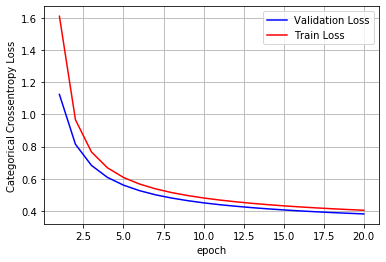

In [17]:
score = model.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])


fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

# print(history.history.keys())
# dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
# history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# val_acc : validation accuracy

# loss : training loss
# acc : train accuracy
# for each key in histrory.histrory we will have a list of length equal to number of epochs

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

# 2 Model A : 2 Hidden Layes.

 ## 2.1 MLP + ReLU activation + Adam Optimizer 

In [18]:
# Multilayer perceptron

model_relu = Sequential()
model_relu.add(Dense(256, activation='relu', input_shape=(input_dim,)))
model_relu.add(Dense(128, activation='relu'))
model_relu.add(Dense(output_dim, activation='softmax'))

model_relu.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 256)               200960    
_________________________________________________________________
dense_2 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_3 (Dense)              (None, 10)                1290      
Total params: 235,146
Trainable params: 235,146
Non-trainable params: 0
_________________________________________________________________


In [19]:
model_relu.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model_relu.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 1s 17us/sample - loss: 0.3368 - acc: 0.9054 - val_loss: 0.1517 - val_acc: 0.9565
Epoch 2/20
60000/60000 [==============================] - 1s 15us/sample - loss: 0.1285 - acc: 0.9627 - val_loss: 0.1073 - val_acc: 0.9660
Epoch 3/20
60000/60000 [==============================] - 1s 16us/sample - loss: 0.0840 - acc: 0.9751 - val_loss: 0.0877 - val_acc: 0.9737
Epoch 4/20
60000/60000 [==============================] - 1s 16us/sample - loss: 0.0615 - acc: 0.9815 - val_loss: 0.0834 - val_acc: 0.9747
Epoch 5/20
60000/60000 [==============================] - 1s 15us/sample - loss: 0.0459 - acc: 0.9857 - val_loss: 0.0781 - val_acc: 0.9771
Epoch 6/20
60000/60000 [==============================] - 1s 15us/sample - loss: 0.0360 - acc: 0.9893 - val_loss: 0.0836 - val_acc: 0.9745
Epoch 7/20
60000/60000 [==============================] - 1s 15us/sample - loss: 0.0257 - acc: 0.9924 - val_loss: 0.

Test score: 0.08297917389905415
Test accuracy: 0.9815


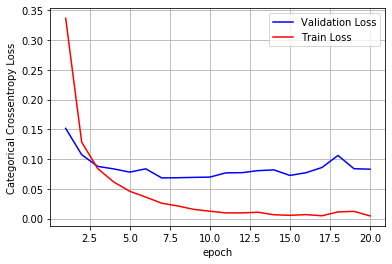

In [20]:
score = model_relu.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

# print(history.history.keys())
# dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
# history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# val_acc : validation accuracy

# loss : training loss
# acc : train accuracy
# for each key in histrory.histrory we will have a list of length equal to number of epochs

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

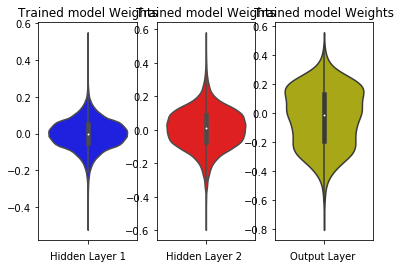

In [21]:
w_after = model_relu.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
out_w = w_after[4].flatten().reshape(-1,1)


fig = plt.figure()
plt.title("Weight matrices after model trained")
plt.subplot(1, 3, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 3, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 3, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show()

## 2.2 MLP + ReLU activation + Adam Optimizer (Batch Normalization)

---



In [22]:

model_relu = Sequential()
model_relu.add(Dense(256, activation='relu', input_shape=(input_dim,), kernel_initializer=RandomNormal(mean=0.0, stddev=0.039, seed=None)))
model_relu.add(BatchNormalization())

model_relu.add(Dense(128, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.55, seed=None)) )
model_relu.add(BatchNormalization())

model_relu.add(Dense(output_dim, activation='softmax'))


model_relu.summary()


Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 256)               200960    
_________________________________________________________________
batch_normalization (BatchNo (None, 256)               1024      
_________________________________________________________________
dense_5 (Dense)              (None, 128)               32896     
_________________________________________________________________
batch_normalization_1 (Batch (None, 128)               512       
_________________________________________________________________
dense_6 (Dense)              (None, 10)                1290      
Total params: 236,682
Trainable params: 235,914
Non-trainable params: 768
_________________________________________________________________


In [23]:
model_relu.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model_relu.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 2s 27us/sample - loss: 0.2629 - acc: 0.9228 - val_loss: 0.2342 - val_acc: 0.9459
Epoch 2/20
60000/60000 [==============================] - 1s 24us/sample - loss: 0.0949 - acc: 0.9726 - val_loss: 0.1076 - val_acc: 0.9666
Epoch 3/20
60000/60000 [==============================] - 1s 24us/sample - loss: 0.0590 - acc: 0.9835 - val_loss: 0.0864 - val_acc: 0.9723
Epoch 4/20
60000/60000 [==============================] - 1s 24us/sample - loss: 0.0401 - acc: 0.9889 - val_loss: 0.0835 - val_acc: 0.9727
Epoch 5/20
60000/60000 [==============================] - 1s 24us/sample - loss: 0.0264 - acc: 0.9933 - val_loss: 0.0838 - val_acc: 0.9731
Epoch 6/20
60000/60000 [==============================] - 1s 23us/sample - loss: 0.0192 - acc: 0.9952 - val_loss: 0.0858 - val_acc: 0.9739
Epoch 7/20
60000/60000 [==============================] - 1s 23us/sample - loss: 0.0139 - acc: 0.9969 - val_loss: 0.

Test score: 0.0921328787419421
Test accuracy: 0.9782


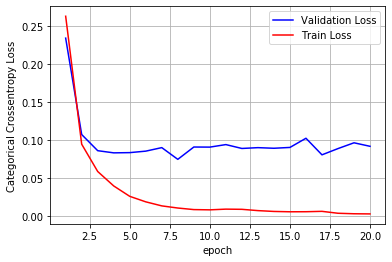

In [24]:
score = model_relu.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

# print(history.history.keys())
# dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
# history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# val_acc : validation accuracy

# loss : training loss
# acc : train accuracy
# for each key in histrory.histrory we will have a list of length equal to number of epochs

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

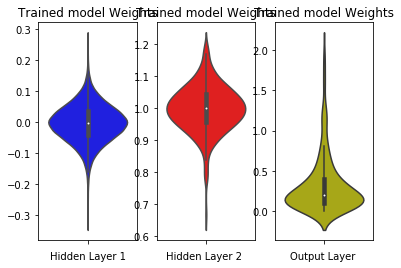

In [25]:
w_after = model_relu.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
out_w = w_after[4].flatten().reshape(-1,1)


fig = plt.figure()
plt.title("Weight matrices after model trained")
plt.subplot(1, 3, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 3, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 3, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show()

## 2.3 MLP + ReLU activation + Adam Optimizer (Dropout) 



In [26]:
from tensorflow.keras.layers import Dense, Dropout
model_relu = Sequential()
model_relu.add(Dense(256, activation='relu', input_shape=(input_dim,)))
model_relu.add(Dropout(0.5))
model_relu.add(Dense(128, activation='relu'))
model_relu.add(Dropout(0.5))
model_relu.add(Dense(output_dim, activation='softmax'))


model_relu.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 256)               200960    
_________________________________________________________________
dropout (Dropout)            (None, 256)               0         
_________________________________________________________________
dense_8 (Dense)              (None, 128)               32896     
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_9 (Dense)              (None, 10)                1290      
Total params: 235,146
Trainable params: 235,146
Non-trainable params: 0
_________________________________________________________________


In [28]:
model_relu.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model_relu.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 1s 16us/sample - loss: 0.6157 - acc: 0.8078 - val_loss: 0.1968 - val_acc: 0.9420
Epoch 2/20
60000/60000 [==============================] - 1s 14us/sample - loss: 0.2708 - acc: 0.9227 - val_loss: 0.1439 - val_acc: 0.9555
Epoch 3/20
60000/60000 [==============================] - 1s 14us/sample - loss: 0.2128 - acc: 0.9383 - val_loss: 0.1206 - val_acc: 0.9631
Epoch 4/20
60000/60000 [==============================] - 1s 14us/sample - loss: 0.1786 - acc: 0.9478 - val_loss: 0.1056 - val_acc: 0.9677
Epoch 5/20
60000/60000 [==============================] - 1s 14us/sample - loss: 0.1581 - acc: 0.9539 - val_loss: 0.0912 - val_acc: 0.9709
Epoch 6/20
60000/60000 [==============================] - 1s 14us/sample - loss: 0.1410 - acc: 0.9586 - val_loss: 0.0874 - val_acc: 0.9741
Epoch 7/20
60000/60000 [==============================] - 1s 14us/sample - loss: 0.1271 - acc: 0.9635 - val_loss: 0.

Test score: 0.06762538701674711
Test accuracy: 0.9807


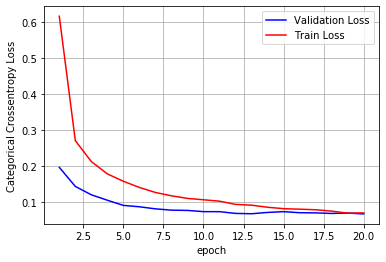

In [29]:
score = model_relu.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

# print(history.history.keys())
# dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
# history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# val_acc : validation accuracy

# loss : training loss
# acc : train accuracy
# for each key in histrory.histrory we will have a list of length equal to number of epochs

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

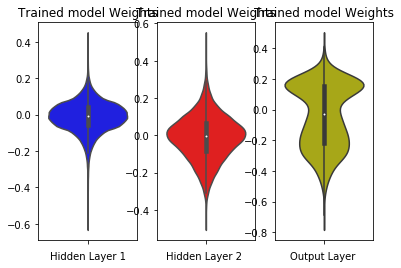

In [30]:
w_after = model_relu.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
out_w = w_after[4].flatten().reshape(-1,1)


fig = plt.figure()
plt.title("Weight matrices after model trained")
plt.subplot(1, 3, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 3, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 3, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show()

## 2.4 MLP + ReLU activation + Adam Optimizer (Batch Normalization And Dropout) 

---



In [43]:
# https://stackoverflow.com/questions/34716454/where-do-i-call-the-batchnormalization-function-in-keras
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.layers import BatchNormalization

model_relu = Sequential()
model_relu.add(Dense(512, activation='relu', input_shape=(input_dim,), kernel_initializer=RandomNormal(mean=0.0, stddev=0.039, seed=None)))
model_relu.add(BatchNormalization())
model_relu.add(Dropout(0.5))
model_relu.add(Dense(256, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.55, seed=None)) )
model_relu.add(BatchNormalization())
model_relu.add(Dropout(0.5))
model_relu.add(Dense(output_dim, activation='softmax'))

model_relu.summary()

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_25 (Dense)             (None, 512)               401920    
_________________________________________________________________
batch_normalization_12 (Batc (None, 512)               2048      
_________________________________________________________________
dropout_8 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_26 (Dense)             (None, 256)               131328    
_________________________________________________________________
batch_normalization_13 (Batc (None, 256)               1024      
_________________________________________________________________
dropout_9 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_27 (Dense)             (None, 10)              

In [44]:
model_relu.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model_relu.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 2s 29us/sample - loss: 0.5073 - acc: 0.8475 - val_loss: 0.2614 - val_acc: 0.9276
Epoch 2/20
60000/60000 [==============================] - 1s 24us/sample - loss: 0.2434 - acc: 0.9255 - val_loss: 0.1316 - val_acc: 0.9594
Epoch 3/20
60000/60000 [==============================] - 1s 22us/sample - loss: 0.1902 - acc: 0.9425 - val_loss: 0.1082 - val_acc: 0.9666
Epoch 4/20
60000/60000 [==============================] - 1s 22us/sample - loss: 0.1643 - acc: 0.9491 - val_loss: 0.0903 - val_acc: 0.9720
Epoch 5/20
60000/60000 [==============================] - 1s 23us/sample - loss: 0.1431 - acc: 0.9552 - val_loss: 0.0876 - val_acc: 0.9716
Epoch 6/20
60000/60000 [==============================] - 1s 23us/sample - loss: 0.1314 - acc: 0.9594 - val_loss: 0.0815 - val_acc: 0.9744
Epoch 7/20
60000/60000 [==============================] - 1s 22us/sample - loss: 0.1193 - acc: 0.9629 - val_loss: 0.

Test score: 0.06247625293707533
Test accuracy: 0.9828


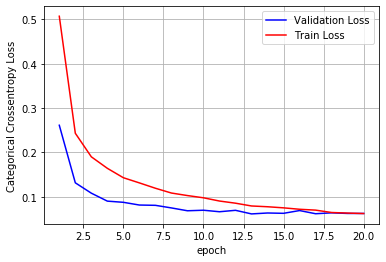

In [45]:
score = model_relu.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

# print(history.history.keys())
# dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
# history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# val_acc : validation accuracy

# loss : training loss
# acc : train accuracy
# for each key in histrory.histrory we will have a list of length equal to number of epochs

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

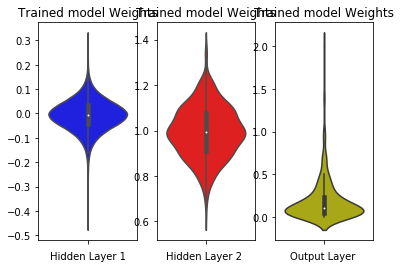

In [46]:
w_after = model_relu.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
out_w = w_after[4].flatten().reshape(-1,1)


fig = plt.figure()
plt.title("Weight matrices after model trained")
plt.subplot(1, 3, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 3, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 3, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show()

# 3 Model B : 3 Hidden Layers

## 3.1 MLP + ReLU activation + Adam Optimizer

In [27]:
# Multilayer perceptron

model_relu = Sequential()
model_relu.add(Dense(512, activation='relu', input_shape=(input_dim,)))
model_relu.add(Dense(256, activation='relu'))
model_relu.add(Dense(128, activation='relu'))
model_relu.add(Dense(output_dim, activation='softmax'))

model_relu.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_10 (Dense)             (None, 512)               401920    
_________________________________________________________________
dense_11 (Dense)             (None, 256)               131328    
_________________________________________________________________
dense_12 (Dense)             (None, 128)               32896     
_________________________________________________________________
dense_13 (Dense)             (None, 10)                1290      
Total params: 567,434
Trainable params: 567,434
Non-trainable params: 0
_________________________________________________________________


In [28]:
model_relu.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model_relu.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 1s 20us/sample - loss: 0.2768 - acc: 0.9198 - val_loss: 0.1221 - val_acc: 0.9613
Epoch 2/20
60000/60000 [==============================] - 1s 18us/sample - loss: 0.0959 - acc: 0.9713 - val_loss: 0.0857 - val_acc: 0.9722
Epoch 3/20
60000/60000 [==============================] - 1s 17us/sample - loss: 0.0607 - acc: 0.9811 - val_loss: 0.0795 - val_acc: 0.9747
Epoch 4/20
60000/60000 [==============================] - 1s 18us/sample - loss: 0.0398 - acc: 0.9880 - val_loss: 0.0826 - val_acc: 0.9737
Epoch 5/20
60000/60000 [==============================] - 1s 17us/sample - loss: 0.0306 - acc: 0.9901 - val_loss: 0.0670 - val_acc: 0.9803
Epoch 6/20
60000/60000 [==============================] - 1s 18us/sample - loss: 0.0218 - acc: 0.9931 - val_loss: 0.0691 - val_acc: 0.9801
Epoch 7/20
60000/60000 [==============================] - 1s 18us/sample - loss: 0.0158 - acc: 0.9949 - val_loss: 0.

Test score: 0.08133461526854412
Test accuracy: 0.9824


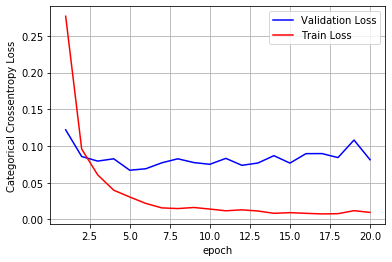

In [29]:
score = model_relu.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

# print(history.history.keys())
# dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
# history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# val_acc : validation accuracy

# loss : training loss
# acc : train accuracy
# for each key in histrory.histrory we will have a list of length equal to number of epochs

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

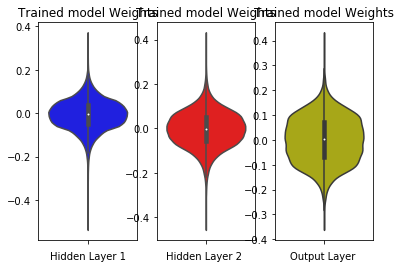

In [30]:
w_after = model_relu.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
out_w = w_after[4].flatten().reshape(-1,1)


fig = plt.figure()
plt.title("Weight matrices after model trained")
plt.subplot(1, 3, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 3, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 3, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show()

## 3.2 MLP + ReLU activation + Adam Optimizer (Batch Normalization) 



In [31]:

model_relu = Sequential()
model_relu.add(Dense(512, activation='relu', input_shape=(input_dim,), kernel_initializer=RandomNormal(mean=0.0, stddev=0.039, seed=None)))
model_relu.add(BatchNormalization())

model_relu.add(Dense(256, activation='relu', input_shape=(input_dim,), kernel_initializer=RandomNormal(mean=0.0, stddev=0.039, seed=None)))
model_relu.add(BatchNormalization())

model_relu.add(Dense(128, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.55, seed=None)) )
model_relu.add(BatchNormalization())

model_relu.add(Dense(output_dim, activation='softmax'))


model_relu.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_14 (Dense)             (None, 512)               401920    
_________________________________________________________________
batch_normalization_2 (Batch (None, 512)               2048      
_________________________________________________________________
dense_15 (Dense)             (None, 256)               131328    
_________________________________________________________________
batch_normalization_3 (Batch (None, 256)               1024      
_________________________________________________________________
dense_16 (Dense)             (None, 128)               32896     
_________________________________________________________________
batch_normalization_4 (Batch (None, 128)               512       
_________________________________________________________________
dense_17 (Dense)             (None, 10)               

In [32]:
model_relu.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model_relu.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 2s 33us/sample - loss: 0.1911 - acc: 0.9430 - val_loss: 0.1891 - val_acc: 0.9567
Epoch 2/20
60000/60000 [==============================] - 2s 29us/sample - loss: 0.0636 - acc: 0.9813 - val_loss: 0.0882 - val_acc: 0.9714
Epoch 3/20
60000/60000 [==============================] - 2s 27us/sample - loss: 0.0386 - acc: 0.9885 - val_loss: 0.0887 - val_acc: 0.9706
Epoch 4/20
60000/60000 [==============================] - 2s 28us/sample - loss: 0.0245 - acc: 0.9929 - val_loss: 0.0799 - val_acc: 0.9751
Epoch 5/20
60000/60000 [==============================] - 2s 28us/sample - loss: 0.0170 - acc: 0.9948 - val_loss: 0.0755 - val_acc: 0.9774
Epoch 6/20
60000/60000 [==============================] - 2s 27us/sample - loss: 0.0163 - acc: 0.9946 - val_loss: 0.0743 - val_acc: 0.9782
Epoch 7/20
60000/60000 [==============================] - 2s 28us/sample - loss: 0.0162 - acc: 0.9946 - val_loss: 0.

Test score: 0.07600605861382428
Test accuracy: 0.9801


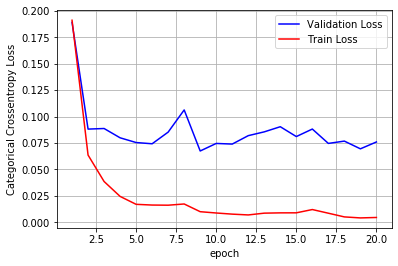

In [33]:
score = model_relu.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

# print(history.history.keys())
# dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
# history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# val_acc : validation accuracy

# loss : training loss
# acc : train accuracy
# for each key in histrory.histrory we will have a list of length equal to number of epochs

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

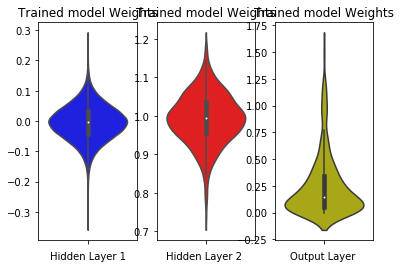

In [34]:
w_after = model_relu.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
out_w = w_after[4].flatten().reshape(-1,1)


fig = plt.figure()
plt.title("Weight matrices after model trained")
plt.subplot(1, 3, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 3, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 3, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show()

## 3.3  MLP + ReLU activation + Adam Optimizer (Dropout) 

---



In [37]:
from tensorflow.keras.layers import Dense, Dropout
model_relu = Sequential()
model_relu.add(Dense(512, activation='relu', input_shape=(input_dim,)))
model_relu.add(Dropout(0.5))
model_relu.add(Dense(256, activation='relu', input_shape=(input_dim,)))
model_relu.add(Dropout(0.5))
model_relu.add(Dense(128, activation='relu'))
model_relu.add(Dropout(0.5))
model_relu.add(Dense(output_dim, activation='softmax'))


model_relu.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_22 (Dense)             (None, 512)               401920    
_________________________________________________________________
dropout_5 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_23 (Dense)             (None, 256)               131328    
_________________________________________________________________
dropout_6 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_24 (Dense)             (None, 128)               32896     
_________________________________________________________________
dropout_7 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_25 (Dense)             (None, 10)               

In [38]:
model_relu.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model_relu.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 1s 25us/sample - loss: 0.6499 - acc: 0.7962 - val_loss: 0.1777 - val_acc: 0.9473
Epoch 2/20
60000/60000 [==============================] - 1s 19us/sample - loss: 0.2462 - acc: 0.9301 - val_loss: 0.1243 - val_acc: 0.9639
Epoch 3/20
60000/60000 [==============================] - 1s 19us/sample - loss: 0.1854 - acc: 0.9484 - val_loss: 0.1046 - val_acc: 0.9694
Epoch 4/20
60000/60000 [==============================] - 1s 19us/sample - loss: 0.1562 - acc: 0.9573 - val_loss: 0.0901 - val_acc: 0.9738
Epoch 5/20
60000/60000 [==============================] - 1s 19us/sample - loss: 0.1335 - acc: 0.9629 - val_loss: 0.0922 - val_acc: 0.9729
Epoch 6/20
60000/60000 [==============================] - 1s 19us/sample - loss: 0.1195 - acc: 0.9667 - val_loss: 0.0801 - val_acc: 0.9764
Epoch 7/20
60000/60000 [==============================] - 1s 20us/sample - loss: 0.1113 - acc: 0.9682 - val_loss: 0.

Test score: 0.06959878407377218
Test accuracy: 0.9819


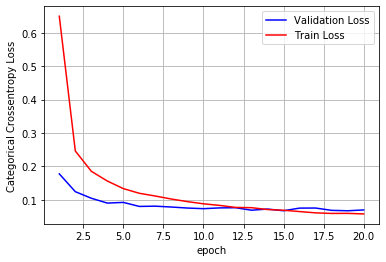

In [39]:
score = model_relu.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

# print(history.history.keys())
# dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
# history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# val_acc : validation accuracy

# loss : training loss
# acc : train accuracy
# for each key in histrory.histrory we will have a list of length equal to number of epochs

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

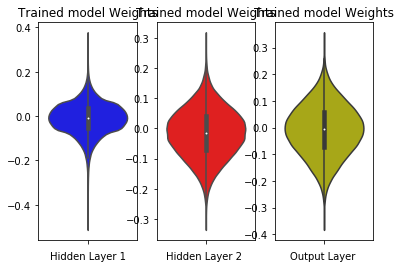

In [40]:
w_after = model_relu.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
out_w = w_after[4].flatten().reshape(-1,1)


fig = plt.figure()
plt.title("Weight matrices after model trained")
plt.subplot(1, 3, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 3, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 3, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show()

## 3.4  MLP + ReLU activation + Adam Optimizer (Batch Normalization And Dropout) </h3>

---



In [41]:
# https://stackoverflow.com/questions/34716454/where-do-i-call-the-batchnormalization-function-in-keras
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.layers import BatchNormalization

model_relu = Sequential()
model_relu.add(Dense(512, activation='relu', input_shape=(input_dim,), kernel_initializer=RandomNormal(mean=0.0, stddev=0.039, seed=None)))
model_relu.add(BatchNormalization())
model_relu.add(Dropout(0.5))
model_relu.add(Dense(256, activation='relu', input_shape=(input_dim,), kernel_initializer=RandomNormal(mean=0.0, stddev=0.039, seed=None)))
model_relu.add(BatchNormalization())
model_relu.add(Dropout(0.5))
model_relu.add(Dense(128, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.55, seed=None)) )
model_relu.add(BatchNormalization())
model_relu.add(Dropout(0.5))
model_relu.add(Dense(output_dim, activation='softmax'))

model_relu.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_26 (Dense)             (None, 512)               401920    
_________________________________________________________________
batch_normalization_5 (Batch (None, 512)               2048      
_________________________________________________________________
dropout_8 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_27 (Dense)             (None, 256)               131328    
_________________________________________________________________
batch_normalization_6 (Batch (None, 256)               1024      
_________________________________________________________________
dropout_9 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_28 (Dense)             (None, 128)              

In [42]:
model_relu.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model_relu.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 2s 39us/sample - loss: 0.6492 - acc: 0.8044 - val_loss: 0.2474 - val_acc: 0.9326
Epoch 2/20
60000/60000 [==============================] - 2s 30us/sample - loss: 0.2785 - acc: 0.9188 - val_loss: 0.1351 - val_acc: 0.9573
Epoch 3/20
60000/60000 [==============================] - 2s 29us/sample - loss: 0.2083 - acc: 0.9402 - val_loss: 0.1120 - val_acc: 0.9667
Epoch 4/20
60000/60000 [==============================] - 2s 31us/sample - loss: 0.1712 - acc: 0.9503 - val_loss: 0.1012 - val_acc: 0.9688
Epoch 5/20
60000/60000 [==============================] - 2s 30us/sample - loss: 0.1500 - acc: 0.9558 - val_loss: 0.0898 - val_acc: 0.9737
Epoch 6/20
60000/60000 [==============================] - 2s 31us/sample - loss: 0.1338 - acc: 0.9602 - val_loss: 0.0846 - val_acc: 0.9748
Epoch 7/20
60000/60000 [==============================] - 2s 31us/sample - loss: 0.1210 - acc: 0.9644 - val_loss: 0.

Test score: 0.06073868394402962
Test accuracy: 0.9836


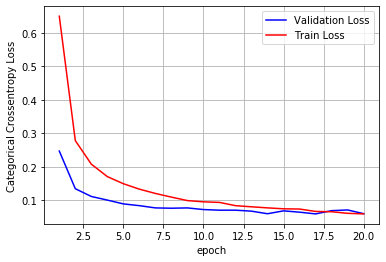

In [43]:
score = model_relu.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

# print(history.history.keys())
# dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
# history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# val_acc : validation accuracy

# loss : training loss
# acc : train accuracy
# for each key in histrory.histrory we will have a list of length equal to number of epochs

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

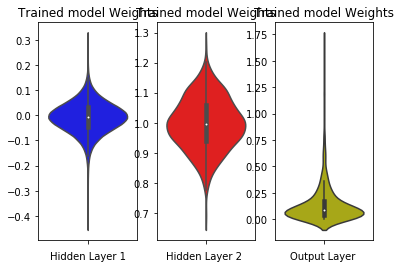

In [44]:
w_after = model_relu.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
out_w = w_after[4].flatten().reshape(-1,1)


fig = plt.figure()
plt.title("Weight matrices after model trained")
plt.subplot(1, 3, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 3, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 3, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show()

# 4 Model C : 5 Hidden Layers

## 4.1  MLP + ReLU activation + Adam Optimizer

In [48]:
# Multilayer perceptron

model_relu = Sequential()
model_relu.add(Dense(1024, activation='relu', input_shape=(input_dim,)))
model_relu.add(Dense(512, activation='relu'))
model_relu.add(Dense(256, activation='relu'))
model_relu.add(Dense(128, activation='relu'))
model_relu.add(Dense(64, activation='relu'))
model_relu.add(Dense(output_dim, activation='softmax'))

model_relu.summary()

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_41 (Dense)             (None, 1024)              803840    
_________________________________________________________________
dense_42 (Dense)             (None, 512)               524800    
_________________________________________________________________
dense_43 (Dense)             (None, 256)               131328    
_________________________________________________________________
dense_44 (Dense)             (None, 128)               32896     
_________________________________________________________________
dense_45 (Dense)             (None, 64)                8256      
_________________________________________________________________
dense_46 (Dense)             (None, 10)                650       
Total params: 1,501,770
Trainable params: 1,501,770
Non-trainable params: 0
___________________________________________

In [49]:
model_relu.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model_relu.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 2s 29us/sample - loss: 0.2723 - acc: 0.9188 - val_loss: 0.1166 - val_acc: 0.9632
Epoch 2/20
60000/60000 [==============================] - 1s 23us/sample - loss: 0.0874 - acc: 0.9742 - val_loss: 0.0870 - val_acc: 0.9727
Epoch 3/20
60000/60000 [==============================] - 1s 22us/sample - loss: 0.0553 - acc: 0.9822 - val_loss: 0.0737 - val_acc: 0.9758
Epoch 4/20
60000/60000 [==============================] - 1s 22us/sample - loss: 0.0409 - acc: 0.9868 - val_loss: 0.0778 - val_acc: 0.9773
Epoch 5/20
60000/60000 [==============================] - 1s 22us/sample - loss: 0.0321 - acc: 0.9894 - val_loss: 0.0819 - val_acc: 0.9777
Epoch 6/20
60000/60000 [==============================] - 1s 22us/sample - loss: 0.0260 - acc: 0.9920 - val_loss: 0.0681 - val_acc: 0.9805
Epoch 7/20
60000/60000 [==============================] - 1s 22us/sample - loss: 0.0239 - acc: 0.9923 - val_loss: 0.

Test score: 0.10951780684681689
Test accuracy: 0.9812


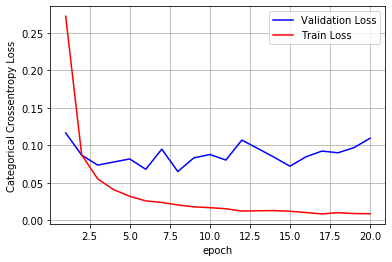

In [50]:
score = model_relu.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

# print(history.history.keys())
# dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
# history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# val_acc : validation accuracy

# loss : training loss
# acc : train accuracy
# for each key in histrory.histrory we will have a list of length equal to number of epochs

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

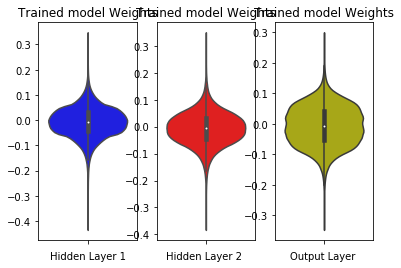

In [51]:
w_after = model_relu.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
out_w = w_after[4].flatten().reshape(-1,1)


fig = plt.figure()
plt.title("Weight matrices after model trained")
plt.subplot(1, 3, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 3, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 3, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show()

## 4.2 MLP + ReLU activation + Adam Optimizer (Batch Normalization)
---



In [54]:

model_relu = Sequential()
model_relu.add(Dense(1024, activation='relu', input_shape=(input_dim,), kernel_initializer=RandomNormal(mean=0.0, stddev=0.039, seed=None)))
model_relu.add(BatchNormalization())

model_relu.add(Dense(512, activation='relu', input_shape=(input_dim,), kernel_initializer=RandomNormal(mean=0.0, stddev=0.039, seed=None)))
model_relu.add(BatchNormalization())

model_relu.add(Dense(256, activation='relu', input_shape=(input_dim,), kernel_initializer=RandomNormal(mean=0.0, stddev=0.039, seed=None)))
model_relu.add(BatchNormalization())

model_relu.add(Dense(128, activation='relu', input_shape=(input_dim,), kernel_initializer=RandomNormal(mean=0.0, stddev=0.039, seed=None)))
model_relu.add(BatchNormalization())

model_relu.add(Dense(64, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.55, seed=None)) )
model_relu.add(BatchNormalization())

model_relu.add(Dense(output_dim, activation='softmax'))


model_relu.summary()

Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_53 (Dense)             (None, 1024)              803840    
_________________________________________________________________
batch_normalization_13 (Batc (None, 1024)              4096      
_________________________________________________________________
dense_54 (Dense)             (None, 512)               524800    
_________________________________________________________________
batch_normalization_14 (Batc (None, 512)               2048      
_________________________________________________________________
dense_55 (Dense)             (None, 256)               131328    
_________________________________________________________________
batch_normalization_15 (Batc (None, 256)               1024      
_________________________________________________________________
dense_56 (Dense)             (None, 128)             

In [55]:
model_relu.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model_relu.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 3s 53us/sample - loss: 0.1942 - acc: 0.9437 - val_loss: 0.2284 - val_acc: 0.9233
Epoch 2/20
60000/60000 [==============================] - 2s 36us/sample - loss: 0.0679 - acc: 0.9795 - val_loss: 0.1042 - val_acc: 0.9675
Epoch 3/20
60000/60000 [==============================] - 2s 38us/sample - loss: 0.0450 - acc: 0.9863 - val_loss: 0.0982 - val_acc: 0.9715
Epoch 4/20
60000/60000 [==============================] - 2s 40us/sample - loss: 0.0334 - acc: 0.9892 - val_loss: 0.0742 - val_acc: 0.9781
Epoch 5/20
60000/60000 [==============================] - 2s 38us/sample - loss: 0.0340 - acc: 0.9889 - val_loss: 0.0882 - val_acc: 0.9766
Epoch 6/20
60000/60000 [==============================] - 2s 38us/sample - loss: 0.0269 - acc: 0.9911 - val_loss: 0.0711 - val_acc: 0.9792
Epoch 7/20
60000/60000 [==============================] - 2s 38us/sample - loss: 0.0206 - acc: 0.9934 - val_loss: 0.

Test score: 0.07663915940060397
Test accuracy: 0.9817


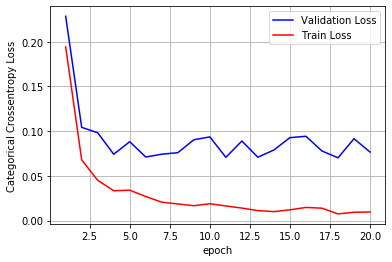

In [56]:
score = model_relu.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

# print(history.history.keys())
# dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
# history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# val_acc : validation accuracy

# loss : training loss
# acc : train accuracy
# for each key in histrory.histrory we will have a list of length equal to number of epochs

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

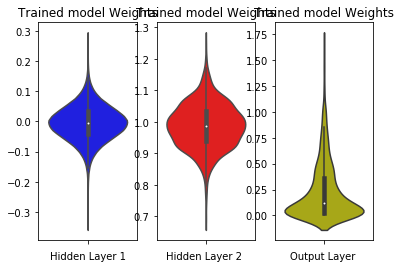

In [57]:
w_after = model_relu.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
out_w = w_after[4].flatten().reshape(-1,1)


fig = plt.figure()
plt.title("Weight matrices after model trained")
plt.subplot(1, 3, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 3, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 3, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show()

## 4.3 MLP + ReLU activation + Adam Optimizer (Dropout) 

---



In [58]:
from tensorflow.keras.layers import Dense, Dropout
model_relu = Sequential()
model_relu.add(Dense(1024, activation='relu', input_shape=(input_dim,)))
model_relu.add(Dropout(0.5))
model_relu.add(Dense(512, activation='relu', input_shape=(input_dim,)))
model_relu.add(Dropout(0.5))
model_relu.add(Dense(256, activation='relu', input_shape=(input_dim,)))
model_relu.add(Dropout(0.5))
model_relu.add(Dense(128, activation='relu', input_shape=(input_dim,)))
model_relu.add(Dropout(0.5))
model_relu.add(Dense(64, activation='relu'))
model_relu.add(Dropout(0.5))
model_relu.add(Dense(output_dim, activation='softmax'))


model_relu.summary()

Model: "sequential_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_59 (Dense)             (None, 1024)              803840    
_________________________________________________________________
dropout_11 (Dropout)         (None, 1024)              0         
_________________________________________________________________
dense_60 (Dense)             (None, 512)               524800    
_________________________________________________________________
dropout_12 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_61 (Dense)             (None, 256)               131328    
_________________________________________________________________
dropout_13 (Dropout)         (None, 256)               0         
_________________________________________________________________
dense_62 (Dense)             (None, 128)             

In [59]:
model_relu.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model_relu.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 2s 35us/sample - loss: 1.0954 - acc: 0.6175 - val_loss: 0.2343 - val_acc: 0.9394
Epoch 2/20
60000/60000 [==============================] - 1s 24us/sample - loss: 0.3498 - acc: 0.9142 - val_loss: 0.1618 - val_acc: 0.9573
Epoch 3/20
60000/60000 [==============================] - 1s 24us/sample - loss: 0.2637 - acc: 0.9396 - val_loss: 0.1374 - val_acc: 0.9668
Epoch 4/20
60000/60000 [==============================] - 1s 24us/sample - loss: 0.2130 - acc: 0.9511 - val_loss: 0.1190 - val_acc: 0.9711
Epoch 5/20
60000/60000 [==============================] - 1s 24us/sample - loss: 0.1910 - acc: 0.9578 - val_loss: 0.1175 - val_acc: 0.9734
Epoch 6/20
60000/60000 [==============================] - 1s 23us/sample - loss: 0.1701 - acc: 0.9613 - val_loss: 0.1076 - val_acc: 0.9752
Epoch 7/20
60000/60000 [==============================] - 1s 24us/sample - loss: 0.1511 - acc: 0.9658 - val_loss: 0.

Test score: 0.09344992985821433
Test accuracy: 0.9832


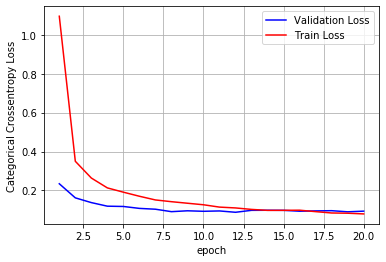

In [60]:
score = model_relu.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

# print(history.history.keys())
# dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
# history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# val_acc : validation accuracy

# loss : training loss
# acc : train accuracy
# for each key in histrory.histrory we will have a list of length equal to number of epochs

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

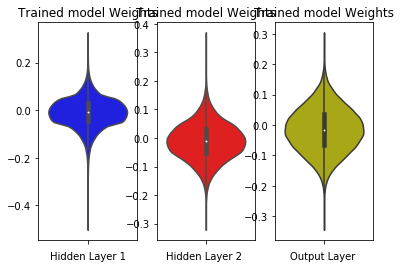

In [61]:
w_after = model_relu.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
out_w = w_after[4].flatten().reshape(-1,1)


fig = plt.figure()
plt.title("Weight matrices after model trained")
plt.subplot(1, 3, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 3, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 3, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show()

## 4.4  MLP + ReLU activation + Adam Optimizer (Batch Normalization And Dropout) 



In [62]:
# https://stackoverflow.com/questions/34716454/where-do-i-call-the-batchnormalization-function-in-keras
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.layers import BatchNormalization

model_relu = Sequential()
model_relu.add(Dense(1024, activation='relu', input_shape=(input_dim,), kernel_initializer=RandomNormal(mean=0.0, stddev=0.039, seed=None)))
model_relu.add(BatchNormalization())
model_relu.add(Dropout(0.5))
model_relu.add(Dense(512, activation='relu', input_shape=(input_dim,), kernel_initializer=RandomNormal(mean=0.0, stddev=0.039, seed=None)))
model_relu.add(BatchNormalization())
model_relu.add(Dropout(0.5))
model_relu.add(Dense(256, activation='relu', input_shape=(input_dim,), kernel_initializer=RandomNormal(mean=0.0, stddev=0.039, seed=None)))
model_relu.add(BatchNormalization())
model_relu.add(Dropout(0.5))
model_relu.add(Dense(128, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.55, seed=None)) )
model_relu.add(BatchNormalization())
model_relu.add(Dropout(0.5))
model_relu.add(Dense(64, activation='relu', input_shape=(input_dim,), kernel_initializer=RandomNormal(mean=0.0, stddev=0.039, seed=None)))
model_relu.add(BatchNormalization())
model_relu.add(Dropout(0.5))
model_relu.add(Dense(output_dim, activation='softmax'))

model_relu.summary()

Model: "sequential_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_65 (Dense)             (None, 1024)              803840    
_________________________________________________________________
batch_normalization_18 (Batc (None, 1024)              4096      
_________________________________________________________________
dropout_16 (Dropout)         (None, 1024)              0         
_________________________________________________________________
dense_66 (Dense)             (None, 512)               524800    
_________________________________________________________________
batch_normalization_19 (Batc (None, 512)               2048      
_________________________________________________________________
dropout_17 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_67 (Dense)             (None, 256)             

In [63]:
model_relu.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model_relu.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 3s 57us/sample - loss: 0.9945 - acc: 0.6910 - val_loss: 0.2776 - val_acc: 0.9128
Epoch 2/20
60000/60000 [==============================] - 2s 39us/sample - loss: 0.3369 - acc: 0.9088 - val_loss: 0.1529 - val_acc: 0.9581
Epoch 3/20
60000/60000 [==============================] - 2s 40us/sample - loss: 0.2403 - acc: 0.9369 - val_loss: 0.1225 - val_acc: 0.9673
Epoch 4/20
60000/60000 [==============================] - 2s 40us/sample - loss: 0.1955 - acc: 0.9483 - val_loss: 0.1116 - val_acc: 0.9719
Epoch 5/20
60000/60000 [==============================] - 2s 39us/sample - loss: 0.1726 - acc: 0.9548 - val_loss: 0.1008 - val_acc: 0.9737
Epoch 6/20
60000/60000 [==============================] - 2s 41us/sample - loss: 0.1533 - acc: 0.9606 - val_loss: 0.1000 - val_acc: 0.9754
Epoch 7/20
60000/60000 [==============================] - 2s 40us/sample - loss: 0.1369 - acc: 0.9646 - val_loss: 0.

Test score: 0.06646238846067572
Test accuracy: 0.9837


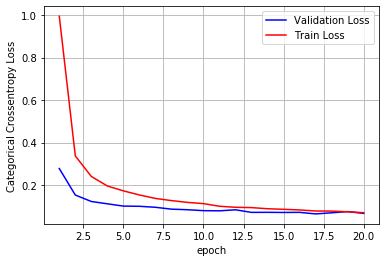

In [64]:
score = model_relu.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

# print(history.history.keys())
# dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
# history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# val_acc : validation accuracy

# loss : training loss
# acc : train accuracy
# for each key in histrory.histrory we will have a list of length equal to number of epochs

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

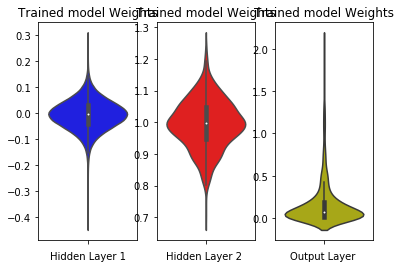

In [65]:
w_after = model_relu.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
out_w = w_after[4].flatten().reshape(-1,1)


fig = plt.figure()
plt.title("Weight matrices after model trained")
plt.subplot(1, 3, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 3, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 3, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show()

# 5. Summary of all the above models

In [73]:
# To summarize the results:
# summary table in jupyter notebook
# http://zetcode.com/python/prettytable/
# https://stackoverflow.com/questions/35160256/how-do-i-output-lists-as-a-table-in-jupyter-notebook

from prettytable import PrettyTable
print("Epoch : 20 and Batch Size : 256")
x = PrettyTable()

x.field_names = ["Model","Hidden Layers","Architecture","Batch Normalization","Dropout","Loss","Accuracy"]

x.add_row(["MLP + ReLU + Adam", "2","784->256->128->10","No","No",0.082,98.1])
x.add_row(["MLP + ReLU + Adam", "2","784->256->128->10","Yes","No",0.092,97.8])
x.add_row(["MLP + ReLU + Adam", "2","784->256->128->10","No","Yes",0.067,98.0])
x.add_row(["MLP + ReLU + Adam", "2","784->256->128->10","Yes","Yes",0.062,98.2])
x.add_row(["MLP + ReLU + Adam", "3","784->512->256->128->10","No","No",0.081,98.2])
x.add_row(["MLP + ReLU + Adam", "3","784->512->256->128->10","Yes","No",0.076,98.0])
x.add_row(["MLP + ReLU + Adam", "3","784->512->256->128->10","No","Yes",0.069,98.1])
x.add_row(["MLP + ReLU + Adam", "3","784->512->256->128->10","Yes","Yes",0.060,98.3])
x.add_row(["MLP + ReLU + Adam", "5","784->1024->512->256->128->64->10","No","No",0.109,98.1])
x.add_row(["MLP + ReLU + Adam", "5","784->1024->512->256->128->64->10","Yes","No",0.076,98.1])
x.add_row(["MLP + ReLU + Adam", "5","784->1024->512->256->128->64->10","No","Yes",0.093,98.3])
x.add_row(["MLP + ReLU + Adam", "5","784->1024->512->256->128->64->10","Yes","Yes",0.066,98.3])

print(x)

Epoch : 20 and Batch Size : 256
+-------------------+---------------+----------------------------------+---------------------+---------+-------+----------+
|       Model       | Hidden Layers |           Architecture           | Batch Normalization | Dropout |  Loss | Accuracy |
+-------------------+---------------+----------------------------------+---------------------+---------+-------+----------+
| MLP + ReLU + Adam |       2       |        784->256->128->10         |          No         |    No   | 0.082 |   98.1   |
| MLP + ReLU + Adam |       2       |        784->256->128->10         |         Yes         |    No   | 0.092 |   97.8   |
| MLP + ReLU + Adam |       2       |        784->256->128->10         |          No         |   Yes   | 0.067 |   98.0   |
| MLP + ReLU + Adam |       2       |        784->256->128->10         |         Yes         |   Yes   | 0.062 |   98.2   |
| MLP + ReLU + Adam |       3       |      784->512->256->128->10      |          No         |    No